# Ass-1 [Number of Fundings]
Given File 'startup_funding.csv'

Problem Statement : Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings.

Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.rename(columns = {'Date dd/mm/yyyy':'Date'},inplace = True)
df

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3044 entries, 0 to 3043
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
3044 non-null   object
dtypes: object(1)
memory usage: 23.9+ KB


In [5]:
df.Date.isnull().sum()

0

In [6]:
dates = df['Date'].str[-4:]
dates

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
3039    2015
3040    2015
3041    2015
3042    2015
3043    2015
Name: Date, Length: 3044, dtype: object

In [7]:
d = {}
for i in dates:
    d[i] = d.get(i,0)+1
del d['/015']
year = []
fundings = []
for i in sorted(d.keys()):
    year.append(i)
    fundings.append(d[i])

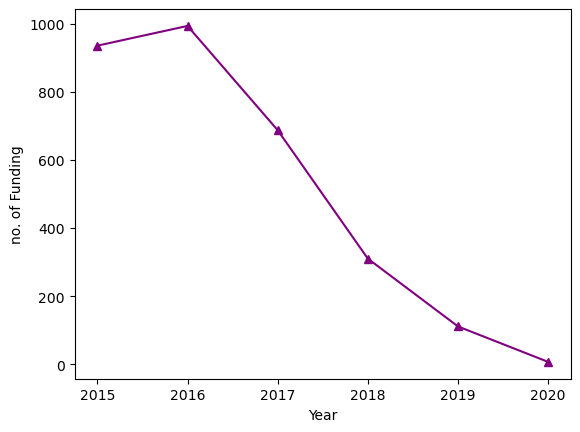

2015 935
2016 993
2017 687
2018 310
2019 111
2020 7


In [8]:
import matplotlib.pyplot as plt
plt.plot(year,fundings,color = 'purple', marker = '^')
plt.xlabel('Year')
plt.ylabel('no. of Funding')
plt.show()

for i in range(len(year)):
    print(year[i], end = " ")
    print(fundings[i])

# Ass-2
Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

In [9]:
df['City  Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3044 entries, 0 to 3043
Series name: City  Location
Non-Null Count  Dtype 
--------------  ----- 
2864 non-null   object
dtypes: object(1)
memory usage: 23.9+ KB


In [10]:
df['City  Location'].isnull().sum()

180

In [11]:
df['City  Location'].dropna(inplace = True)

In [12]:
c = df['City  Location'].values
np_c = np.array(c)
np_c = np_c[np_c != '']

for i in range(len(np_c)):
    if type(np_c[i]) != float :
        
        if 'bangalore' in np_c[i]:
            np_c[i] = 'Bangalore'
        if 'Bengaluru' in np_c[i]:
            np_c[i] = 'Bangalore'
        if 'Delhi' in np_c[i]:
            np_c[i] = 'New Delhi'
        
        
for i in range(len(np_c)):
    if type(np_c[i]) != float:
        np_c[i] = np_c[i].split('/')[0].strip()

In [13]:
city = {}
for row in np_c :
    if row in city:
        city[row] += 1 
    else:
        city[row] = 1

In [14]:
city

{'Bangalore': 852,
 'Gurgaon': 288,
 'New Delhi': 464,
 'Mumbai': 570,
 'Chennai': 98,
 'Pune': 112,
 'Noida': 93,
 'Faridabad': 3,
 'San Francisco': 2,
 'San Jose,': 1,
 'Amritsar': 1,
 'Kormangala': 2,
 'Tulangan': 1,
 'Hyderabad': 100,
 'Burnsville': 1,
 'Menlo Park': 1,
 'Gurugram': 50,
 'Palo Alto': 1,
 'Santa Monica': 1,
 'Singapore': 8,
 'Taramani': 1,
 'Andheri': 1,
 'Chembur': 1,
 'Nairobi': 1,
 'Haryana': 1,
 'New York': 2,
 'Karnataka': 1,
 'Bhopal': 3,
 'India': 5,
 'Jaipur': 30,
 'Nagpur': 3,
 'Indore': 13,
 'California': 1,
 'Ahemadabad': 2,
 'Rourkela': 1,
 'Srinagar': 1,
 'Bhubneswar': 1,
 'Chandigarh': 11,
 'Kolkatta': 1,
 'Kolkata': 21,
 'Coimbatore': 5,
 'Udaipur': 2,
 nan: 180,
 'Ahemdabad': 1,
 'Bhubaneswar': 1,
 'Ahmedabad': 38,
 'Surat': 2,
 'Goa': 11,
 'Uttar Pradesh': 1,
 'Gaya': 1,
 'Vadodara': 10,
 'Trivandrum': 2,
 'Missourie': 1,
 'Panaji': 1,
 'Gwalior': 2,
 'Karur': 1,
 'Udupi': 2,
 'Kochi': 2,
 'Agra': 2,
 'Hubli': 1,
 'Kerala': 1,
 'Kozhikode': 1,
 'US'

In [15]:
x = []
y = []
for c in city:
    if type(c) != float :
        x.append(c)
        y.append(city[c])

np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)
print(np_x)
print(np_y)

['Kolkatta' 'Srinagar' 'Bhubneswar' '\\\\xc2\\\\xa0Mumbai' 'Ahemdabad'
 'Bhubaneswar' 'Uttar Pradesh' 'Gaya' 'Missourie' 'Panaji' 'Karur' 'Hubli'
 'Kerala' 'Kozhikode' 'Lucknow' 'SFO' 'London' 'Seattle' 'Varanasi'
 'Jodhpur' 'Boston' 'Belgaum' '\\\\xc2\\\\xa0Noida'
 '\\\\xc2\\\\xa0Bangalore' 'Rourkela' 'California' 'Dallas' 'Menlo Park'
 'Karnataka' 'Palo Alto' 'Santa Monica' 'Tulangan' 'Taramani' 'Andheri'
 'Chembur' 'Burnsville' 'Haryana' 'San Jose,' 'Nairobi' 'Amritsar' 'Udupi'
 'Trivandrum' 'Kochi' 'San Francisco' 'Agra' 'Surat' 'New York' 'Udaipur'
 'Gwalior' 'Siliguri' 'Ahemadabad' 'USA' 'Kormangala' 'US' 'Faridabad'
 'Bhopal' 'Nagpur' '\\\\xc2\\\\xa0Gurgaon' 'Kanpur' 'India' 'Coimbatore'
 'Singapore' 'Vadodara' 'Chandigarh' 'Goa' 'Indore' 'Kolkata' 'Jaipur'
 'Ahmedabad' 'Gurugram' 'Noida' 'Chennai' 'Hyderabad' 'Pune' 'Gurgaon'
 'New Delhi' 'Mumbai' 'Bangalore']
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1  

In [16]:
np_x = np_x[len(np_x)-1: len(np_x) -11 : -1]
np_y = np_y[len(np_y)-1: len(np_y) -11 : -1]
print(np_x)
print(np_y)

['Bangalore' 'Mumbai' 'New Delhi' 'Gurgaon' 'Pune' 'Hyderabad' 'Chennai'
 'Noida' 'Gurugram' 'Ahmedabad']
[852 570 464 288 112 100  98  93  50  38]


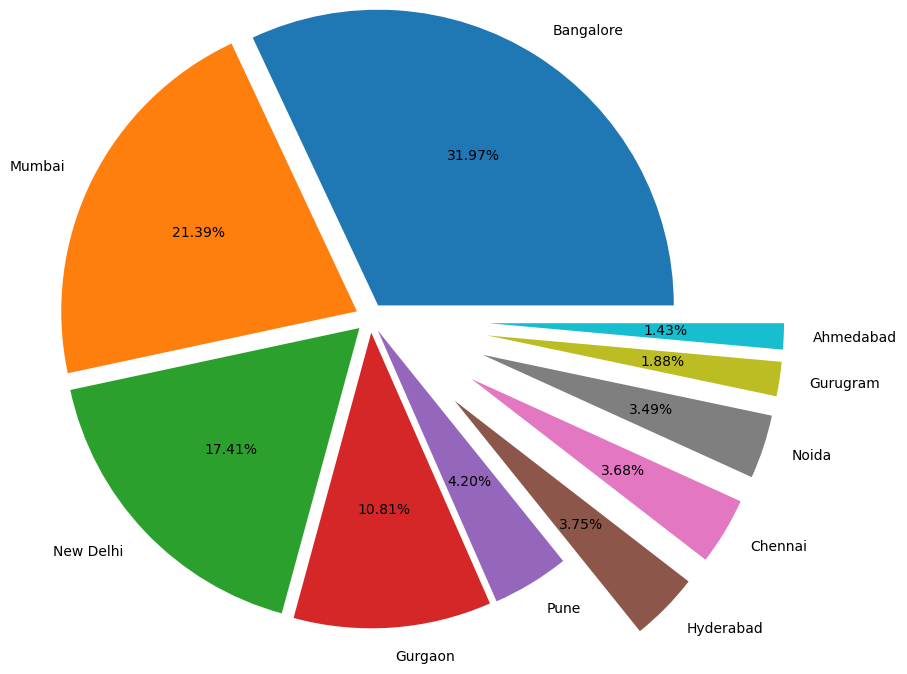

In [17]:
explode = [0.1,0.1,0.1,0.1,0.1,0.8,0.8,0.8,0.8,0.8,]
plt.pie(np_y, labels = np_x, autopct = '%.2f%%', explode = explode,radius = 2)
plt.show()


# Ass-3 [Funding amount]
Given File 'startup_funding.csv' Problem Statement : Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received.

Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note: Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign.

Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding. Output Format : city1 percent1 city2 percent2 city3 percent3 . . . . . . . . .

In [18]:
df['Amount in USD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3044 entries, 0 to 3043
Series name: Amount in USD
Non-Null Count  Dtype 
--------------  ----- 
2084 non-null   object
dtypes: object(1)
memory usage: 23.9+ KB


In [19]:
df['Amount in USD'].isnull().sum()

960

In [20]:
# fill NaN values with 0 in AmountInUSD column
df.loc[df['Amount in USD'].isnull(), 'Amount in USD'] = '0'

In [21]:
#converting string object to convertible int data
df['Amount in USD'] = df['Amount in USD'].str.replace(',','')

In [22]:
amount = []
for i in df['Amount in USD']:
    amount.append(i)
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
    


In [23]:
amount

['200000000',
 '8048394',
 '18358860',
 '3000000',
 '1800000',
 '9000000',
 '150000000',
 '6000000',
 '70000000',
 '50000000',
 '20000000',
 '12000000',
 '30000000',
 '5900000',
 '2000000',
 '50000000',
 '231000000',
 '150000000',
 '486000',
 '1500000',
 'undisclosed',
 '12000000',
 '26000000',
 '17411265',
 '1300000',
 '135000000',
 '300000',
 '220000000',
 '15800000',
 '283000000',
 '200000000',
 '1000000000',
 '45000000',
 '585000000',
 'unknown',
 '4500000',
 '3300000',
 '6000000',
 '5000000',
 '18000000',
 '1000000',
 '10000000',
 '450000000',
 '5000000',
 '20000000',
 '5000000',
 '1600000',
 '140000000',
 '38080000',
 '125000000',
 '11000000',
 '51000000',
 '37000000',
 '500000',
 '110000000',
 '15000000',
 '6590000',
 '1000000',
 'Undisclosed',
 '70000000',
 '3900000000',
 '19000000',
 '2500000',
 '145000',
 '1000000',
 '38080000',
 '500000',
 '150000000',
 '60000000',
 '16000000',
 '5750000',
 '2500000',
 '1000000',
 '319605',
 '51000000',
 '10000000',
 '4889975.54',
 '9000000'

In [24]:
for i in range(len(amount)):
    if amount[i] in [ '\\\\xc2\\\\xa020000000',
       '\\\\xc2\\\\xa016200000', '\\\\xc2\\\\xa0N/A',
       '\\\\xc2\\\\xa0600000', '\\\\xc2\\\\xa0685000',
       '\\\\xc2\\\\xa019350000', '\\\\xc2\\\\xa05000000',
       '\\\\xc2\\\\xa010000000','undisclosed','unknown','Undisclosed','Unknown', '14342000+',]:
        amount[i] = 0

In [25]:
#create np array
np_amount = np.array(amount, dtype = 'float')

City = {}
for i in range(len(np_c)):
    if np_c[i] in City:
        City[np_c[i]] += np_amount[i]
    else:
        City[np_c[i]] = np_amount[i]

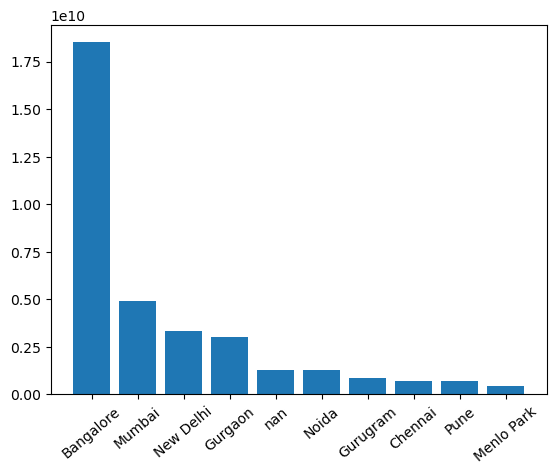

Bangalore 52.74
Mumbai 14.05
New Delhi 9.57
Gurgaon 8.57
nan 3.62
Noida 3.60
Gurugram 2.47
Chennai 2.05
Pune 2.04
Menlo Park 1.28


In [26]:
x = []
y = []
for key in City:
    x.append(key)
    y.append(City[key])
    
np_x = np.array(x)
np_y = np.array(y)

#sort the np_x by np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_x = np_x[len(np_x)-1: len(np_x) -1 -10: -1]
np_y = np_y[len(np_y)-1: len(np_y) -1 -10: -1]

plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], format(np_y[i]*100/sum(np_y), '.2f'))

# Ass-4 [Investment Type]
Given File 'startup_funding.csv'

Problem Statement : There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note : Correct spelling of investment types are -

"Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".

Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format : investmentType1 percent1 investmentType2 percent2 investmentType3 percent3 . . .

In [27]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN


In [28]:
df.rename(columns = {'InvestmentnType':'InvestmentType'},inplace = True)

In [29]:
df['InvestmentType'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [30]:
# delete nan values index wise
df.drop(df.index[df.InvestmentType.isnull()], inplace = True)
df.reset_index(inplace = True, drop = True)

In [31]:
df.replace('Private Equity Round','Private Equity',inplace = True)
df.replace('Private Funding','Private Equity',inplace = True)
df.replace('Private','Private Equity',inplace = True)
df.replace('PrivateEquity','Private Equity',inplace = True)
df.replace('Private\\\\nEquity','Private Equity',inplace = True)
df.replace('Equity','Private Equity',inplace = True)
df.replace('Equity Based Funding','Private Equity',inplace = True)

In [32]:
df.replace('Debt','Debt Funding',inplace = True)
df.replace('Debt and Preference capital','Debt Funding',inplace = True)
df.replace('Structured Debt','Debt Funding',inplace = True)
df.replace('Term Loan','Debt Funding',inplace = True)
df.replace('Debt-Funding','Debt Funding',inplace = True)

In [33]:
df.replace('Seed Round','Seed Funding',inplace = True)
df.replace('Seed','Seed Funding',inplace = True)
df.replace('Seed funding','Seed Funding',inplace = True)
df.replace('Seed / Angle Funding','Seed Funding',inplace = True)
df.replace('Angel / Seed Funding','Seed Funding',inplace = True)
df.replace('Seed / Angle Funding','Seed Funding',inplace = True)
df.replace('Seed/Angel Funding','Seed Funding',inplace = True)
df.replace('Seed / Angel Funding','Seed Funding',inplace = True)
df.replace('Seed/ Angel Funding','Seed Funding',inplace = True)
df.replace('Seed\\\\nFunding','Seed Funding',inplace = True)
df.replace('Seed Funding Round','Seed Funding',inplace = True)
df['InvestmentType'].dropna()

0       Private Equity
1             Series C
2             Series B
3         Pre-series A
4         Seed Funding
             ...      
3035    Private Equity
3036    Private Equity
3037    Private Equity
3038    Private Equity
3039      Seed Funding
Name: InvestmentType, Length: 3040, dtype: object

In [34]:
df['InvestmentType'].unique()

array(['Private Equity', 'Series C', 'Series B', 'Pre-series A',
       'Seed Funding', 'Series A', 'Series D', 'Series F', 'Series E',
       'Debt Funding', 'Series G', 'Series H', 'Venture', 'Funding Round',
       'Corporate Round', 'Maiden Round', 'pre-series A',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Inhouse Funding',
       'Pre Series A', 'Mezzanine', 'Series B (Extension)',
       'Angel Funding', 'Crowd funding', 'Crowd Funding'], dtype=object)

In [38]:
type_fund = []
for i in df.InvestmentType:
    type_fund.append(i)

amt = []
for i in np_amount:
    #print(type(i))
    amt.append(i)

#handle space
#for i in range(len(amt)):
#    amt[i] = ''.join(amt[i].split(','))

In [40]:
np_typefund = np.array(type_fund)
dict_fund = {}
for i in range(len(np_typefund)):
    if np_typefund[i] in dict_fund:
        dict_fund[np_typefund[i]] += amt[i]
    else:
        dict_fund[np_typefund[i]] = amt[i]

In [42]:
x1 = list(dict_fund.keys())
y1 = list(dict_fund.values())
np_x1 = np.array(x1)
np_y1 = np.array(y1)

for i in range(len(np_x1)-1, -1, -1):
    print(np_x1[i], format(np_y1[i]*100/sum(np_y1), '.2f'))

Crowd Funding 0.00
Crowd funding 0.03
Angel Funding 0.00
Series B (Extension) 0.00
Mezzanine 0.00
Pre Series A 0.00
Inhouse Funding 0.00
Bridge Round 0.01
Venture - Series Unknown 0.01
pre-Series A 0.22
Angel Round 0.00
Series J 0.00
Angel 0.01
Pre-Series A 0.09
Venture Round 0.36
Single Venture 0.00
pre-series A 0.02
Maiden Round 0.00
Corporate Round 1.91
Funding Round 0.53
Venture 0.00
Series H 0.39
Series G 0.61
Debt Funding 1.12
Series E 0.08
Series F 0.05
Series D 3.83
Series A 2.27
Seed Funding 35.86
Pre-series A 0.01
Series B 12.11
Series C 1.13
Private Equity 39.36
